In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_parquet('../data/all_data_preprocessed/all_merged.parquet')

In [3]:
df.head(10)

,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,...,990,991,992,993,994,995,996,997,998,999
0,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
1,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
2,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
3,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
4,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
5,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
6,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
7,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
8,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611
9,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0.524,0.702,0.57,0.539,0.521,0.503,0.524,0.504,0.477,0.611


In [4]:
X = df.drop(columns=['event_all_region'])
y = df['event_all_region']


In [5]:
tscv = TimeSeriesSplit(n_splits=5)
splits = list(tscv.split(X))

In [6]:
train_idx, test_idx = splits[-1]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
y_pred = lr_model.predict(X_test_scaled)

In [11]:
accuracy = accuracy_score(y_test, y_pred)

In [12]:
accuracy

0.7819718418440604

In [13]:
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.7707118519159325

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[67795,  7611],
       [15014, 13351]])

In [15]:
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

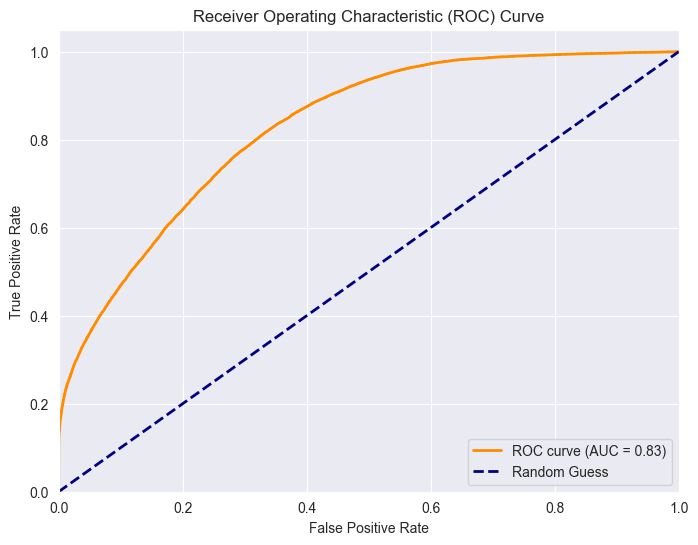

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()